In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [8]:
data = pd.read_csv('WMT1.csv')
data_17 = data[data.Year == 2017]

# calculate the mean std
mean_17 = data_17.groupby('Week_Number')['Return'].mean().tolist()
std_17 = data_17.groupby('Week_Number')['Return'].std().tolist()
week_id_17 = list(data_17.groupby('Week_Number').indices.keys())
color_17 = data_17.groupby('Week_Number')['label'].agg(lambda x: x.mode()).tolist()

data_18 = data[data.Year == 2018]
data_18.drop(data_18.index[-1], inplace=True)

# calculate the mean std
mean_18 = data_18.groupby('Week_Number')['Return'].mean().tolist()
std_18 = data_18.groupby('Week_Number')['Return'].std().tolist()
weekly_18 = data[(data.Year == 2018) & (data.Weekday == 'Friday')]['Adj Close'].values  # select Friday's data

week_id_18 = list(data_18.groupby('Week_Number').indices.keys())
color_18 = data_18.groupby('Week_Number')['label'].agg(lambda x: x.mode()).tolist()


/Users/wangxiaoyang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [59]:
df_17 = pd.DataFrame(
    {
        'id':week_id_17,
        'mean':mean_17,
        'std':std_17,
        'label':color_17
    },
    columns = ['id','mean','std','label']
)

df_18 = pd.DataFrame(
    {
        'id':week_id_18,
        'mean':mean_18,
        'std':std_18,
        'label':color_18
    },
    columns = ['id','mean','std','label']
)

df_17_18 = pd.DataFrame(
    {
        'id':week_id_17+week_id_18,
        'mean':mean_17+mean_18,
        'std':std_17+std_18,
        'label':color_17+color_18
    },
    columns = ['id','mean','std','label']
)

In [60]:
x_train = df_17[['mean','std']].values
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
y_train= df_17['label'].values

x_test = df_18[['mean','std']].values
scaler = StandardScaler()
scaler.fit(x_test)
x_test = scaler.transform(x_test)
y_test = df_18['label'].values

x = df_17_18[['mean','std']].values
scaler = StandardScaler()
scaler.fit(x)
y = df_17_18['label'].values

No handles with labels found to put in legend.


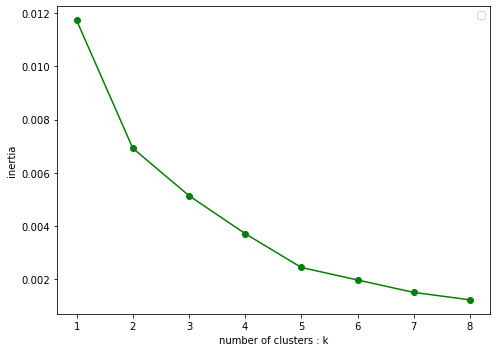

In [61]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



inertia_list = []

for k in range (1 ,9):
    
    kmeans_classifier = KMeans (n_clusters =k)
    y_kmeans = kmeans_classifier.fit_predict(x)
    inertia = kmeans_classifier.inertia_
    inertia_list.append (inertia)
    
fig , ax = plt.subplots(1, figsize =(7,5))
plt.plot(range (1, 9),inertia_list, marker ='o',color ='green')
plt.legend()
plt.xlabel('number of clusters : k')
plt.ylabel('inertia')
plt.tight_layout ()
plt.show()


In [63]:
print('when k = 8 no more signicant decline in inertia')

when k = 8 no more signicant decline in inertia


In [65]:
kmeans_classifier = KMeans(n_clusters =8) 
y_kmeans = kmeans_classifier.fit_predict (x)
centroids = kmeans_classifier.cluster_centers_
y_kmeans

array([0, 0, 2, 0, 7, 2, 7, 6, 0, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 6, 5, 7,
       0, 3, 0, 7, 5, 2, 5, 7, 5, 7, 0, 0, 5, 2, 5, 5, 0, 5, 6, 7, 7, 7,
       7, 1, 5, 5, 5, 5, 7, 5, 5, 7, 7, 7, 0, 3, 7, 4, 0, 2, 7, 0, 6, 3,
       5, 7, 7, 2, 3, 2, 0, 2, 2, 5, 7, 2, 0, 7, 5, 5, 7, 7, 1, 0, 7, 7,
       0, 5, 0, 0, 2, 2, 7, 2, 7, 0, 3, 7, 3, 0, 3, 6], dtype=int32)

In [67]:
for k in range(8):
    green_case = 0
    red_case = 0
    for i in zip(y_kmeans,y):
        if i[0] == k:
            if i[1]=='red':
                red_case+=1
            elif i[1] == 'green':
                green_case+=1
    print('red percent in %d is %f'%(k,red_case/(red_case+green_case)))
    print('green percent in %d is %f'%(k,green_case/(red_case+green_case)))

red percent in 0 is 1.000000
green percent in 0 is 0.000000
red percent in 1 is 0.000000
green percent in 1 is 1.000000
red percent in 2 is 0.000000
green percent in 2 is 1.000000
red percent in 3 is 1.000000
green percent in 3 is 0.000000
red percent in 4 is 1.000000
green percent in 4 is 0.000000
red percent in 5 is 0.407407
green percent in 5 is 0.592593
red percent in 6 is 0.000000
green percent in 6 is 1.000000
red percent in 7 is 0.034483
green percent in 7 is 0.965517


In [68]:
print('cluster 0,1,2,3,4,6,7 are pure clusters')

cluster 0,1,2,3,4,6,7 are pure clusters
